# A4- ANALISE DE BIG DATA - Nelson
Integrantes: 

- Rafael Cezar Coelho da Mota (1220103200)

- Luiz Marcelo Itapicurú Pereira Costa (1220107243)

- Leonardo Valle Lisboa (1220104526)

Nome da empresa: Footvolley Club

Link do repositório Github:https://github.com/luizmipcosta/trabalhoA4/tree/main

Link do Linktree da empresa: https://linktr.ee/Footvolleyclub?fbclid=PAAaaRmgP-8gnBK6hPAIIyvZX0EtmSaKpQbc2LZFdwHs-TZnmeofbyAn_LG6M

Referência do DataSet: https://www.tecnofit.com.br/

O grupo analisou a base de dados de uma empresa real de futevôlei, a Footvolley Club, por meio dos conhecimentos adquiridos durante as aulas lecionadas pelo professor Nelson Carlos Medeiros de Vasconcellos. Dessa forma, soluções informadas pelas informações valiosas extraídas das bases foram desenvolvidas, no intuito de resolver os problemas ou discrepâncias encontradas na base de dados.

# Importação do DATASET
Nesta etapa, importamos nosso DATASET em excel ("BASEDEVENDAS.xlsx") utilizando a biblioteca pandas, trazendo-o para o nosso Notebook do projeto.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
tabela_vendas = pd.DataFrame()
tabela_vendas = pd.read_excel("BASEDEVENDAS.xlsx")
display(tabela_vendas)

,Cliente,Tipo,Plano,Qtd,Valor Item,Recibo,Consultor,Valor Desconto,Data (Recibo),ano,mês,Pessoas
0,JOÃO PEDRO FLEISCHER LUZ MOREIRA,Contrato,PLANO RECORRÊNCIA 2X (SEMESTRAL),1,159.0,115,LUCAS DANTAS,0,2021-01-01 08:31:26,2021,1,1
1,PEDRO LUIZ VALLE LISBOA,Contrato,PLANO DE RECORRÊNCIA 5X (SEMESTRAL),1,179.0,116,LUCAS DANTAS,0,2021-01-01 08:31:27,2021,1,1
2,PEDRO HENRIQUE SOARES NETTO LISBOA,Contrato,PLANO MENSAL - 8 SESSÕES,1,179.0,333,LUCAS DANTAS,0,2021-01-01 16:18:59,2021,1,1
3,SANDRA MARIA XAVIER SALGADO MARTINS,Contrato,PLANO MENSAL 5X,1,199.0,168,LUCAS DANTAS,0,2021-01-01 16:19:51,2021,1,1
4,ADJAN TALES FARIA SANTOS,Contrato,TURMA FECHADA BALA - FABIO,1,167.0,118,LUCAS DANTAS,0,2021-01-03 15:17:46,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2541,ERIC FLORES COELHO,Contrato,PLANO ANUAL 2X,1,169.0,2162,CONSULTOR PADRÃO - LÉO TUBARÃO,0,2024-03-22 22:19:31,2024,3,1
2542,DIEGO FERNANDO RODRIGUES ARAUJO,Contrato,PLANO ANUAL TODO DIA,1,349.0,2360,CONSULTOR PADRÃO - LÉO TUBARÃO,0,2024-04-19 14:29:43,2024,4,1
2543,ERIC FLORES COELHO,Contrato,PLANO ANUAL 2X,1,169.0,2162,CONSULTOR PADRÃO - LÉO TUBARÃO,0,2024-04-22 22:19:31,2024,4,1
2544,DIEGO FERNANDO RODRIGUES ARAUJO,Contrato,PLANO ANUAL TODO DIA,1,349.0,2360,CONSULTOR PADRÃO - LÉO TUBARÃO,0,2024-05-20 14:29:43,2024,5,1


# Faturamento total da empresa
Nessa etapa, utilizando a função soma (.sum()) fizemos o levantamento do faturamento total da empresa com todas as mensalidades e anualidades pagas desde 2021.

In [2]:
faturamento_total = tabela_vendas["Valor Item"].sum()
print(faturamento_total)

570038.4


# Formatação do resultado
Utilizando a função replace e a função format, nós formatamos o resultado para que o mesmo se apresente em forma monetária (Reais), como foi feito abaixo.

In [3]:
numero = faturamento_total
numero_formatado = '{:,}'.format(numero).replace(',', '.')
print("Faturamento Total da Footvolley Club desde 2021:" ,"R$",numero_formatado)

Faturamento Total da Footvolley Club desde 2021: R$ 570.038.4


# Cálculo de indicadores matemáticos (Tendência central)
Nessa parte do projeto foi feito o cálculo de indicadores matemáticos de tendência central como: Média, mediana e moda dos preços dos planos da empresa.

In [4]:
media = tabela_vendas['Valor Item'].mean()

# Calcula a mediana da coluna 'Valor Item'
mediana = tabela_vendas['Valor Item'].median()

# Calcula a moda da coluna 'Valor Item'
moda = tabela_vendas['Valor Item'].mode().values[0]

print("Média/Mediana/Moda dos preços de todos os planos do Futevôlei")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda}')

Média/Mediana/Moda dos preços de todos os planos do Futevôlei
Média: 223.8956794972506
Mediana: 209.0
Moda: 209.0


# Pagamento per capita (Utilização da função groupby)
Aqui nós agrupamos duas colunas utilizando a função (.groupby()) e posteriormente somamos, utilizando a função (.sum()), os pagamentos efetuados. Como resultado, obtivemos uma amostra do DataFrame com a coluna dos clientes e na outra coluna, quanto cada cliente já pagou para a empresa Footvolley Club desde 2021.

In [5]:
pagtotal_por_aluno = tabela_vendas[["Cliente", "Valor Item"]].groupby("Cliente").sum()
display (pagtotal_por_aluno)

,Valor Item
Cliente,
ADERBAL MAGNO CAMINADA SABRA FILHO,7043.0
ADJAN TALES FARIA SANTOS,2486.5
ALAN BASTOS,80.0
ALAN COPELMAN KLIGERMAN,1212.0
ALAN SAPIR,2484.0
...,...
VIOLETTE LE GOFF,1186.0
VITORIA GAERTNER FALCÃO DE LACERDA,179.0
YAN FERNANDES DARDEAU VIEIRA,209.0


# Função Map (Inserção)
Nessa etapa, nós estipulamos uma taxa de 5% que seria destinada ao serviço e poderia servir para ajudar na manutenção das quadras, bolas e redes se a mesma fosse aplicada no sistema. Após isso, utilizando a função (.map()), inserimos à nossa tabela mais duas colunas: A primeira que mostra exatamente o valor de taxa referente a cada plano e aluno ('Taxa'), e a segunda coluna inserida que nos mostra o valor da taxa somado ao valor das mensalidades('Valor com taxa') para facilitar a análise e observação.

In [6]:
def taxa(valor):
    return round (valor * 0.05, 2)
def calcula_taxa (valor):
    return round (valor + taxa(valor))
tabela_vendas['Taxa'] = tabela_vendas ['Valor Item'].map(taxa)
tabela_vendas['Valor com taxa'] = tabela_vendas['Valor Item'].map(calcula_taxa)
display(tabela_vendas)

,Cliente,Tipo,Plano,Qtd,Valor Item,Recibo,Consultor,Valor Desconto,Data (Recibo),ano,mês,Pessoas,Taxa,Valor com taxa
0,JOÃO PEDRO FLEISCHER LUZ MOREIRA,Contrato,PLANO RECORRÊNCIA 2X (SEMESTRAL),1,159.0,115,LUCAS DANTAS,0,2021-01-01 08:31:26,2021,1,1,7.95,167
1,PEDRO LUIZ VALLE LISBOA,Contrato,PLANO DE RECORRÊNCIA 5X (SEMESTRAL),1,179.0,116,LUCAS DANTAS,0,2021-01-01 08:31:27,2021,1,1,8.95,188
2,PEDRO HENRIQUE SOARES NETTO LISBOA,Contrato,PLANO MENSAL - 8 SESSÕES,1,179.0,333,LUCAS DANTAS,0,2021-01-01 16:18:59,2021,1,1,8.95,188
3,SANDRA MARIA XAVIER SALGADO MARTINS,Contrato,PLANO MENSAL 5X,1,199.0,168,LUCAS DANTAS,0,2021-01-01 16:19:51,2021,1,1,9.95,209
4,ADJAN TALES FARIA SANTOS,Contrato,TURMA FECHADA BALA - FABIO,1,167.0,118,LUCAS DANTAS,0,2021-01-03 15:17:46,2021,1,1,8.35,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,ERIC FLORES COELHO,Contrato,PLANO ANUAL 2X,1,169.0,2162,CONSULTOR PADRÃO - LÉO TUBARÃO,0,2024-03-22 22:19:31,2024,3,1,8.45,177
2542,DIEGO FERNANDO RODRIGUES ARAUJO,Contrato,PLANO ANUAL TODO DIA,1,349.0,2360,CONSULTOR PADRÃO - LÉO TUBARÃO,0,2024-04-19 14:29:43,2024,4,1,17.45,366
2543,ERIC FLORES COELHO,Contrato,PLANO ANUAL 2X,1,169.0,2162,CONSULTOR PADRÃO - LÉO TUBARÃO,0,2024-04-22 22:19:31,2024,4,1,8.45,177
2544,DIEGO FERNANDO RODRIGUES ARAUJO,Contrato,PLANO ANUAL TODO DIA,1,349.0,2360,CONSULTOR PADRÃO - LÉO TUBARÃO,0,2024-05-20 14:29:43,2024,5,1,17.45,366


# Mapeamento e organização da tabela
Nessa parte do projeto, nós mapeamos e organizamos nossa tabela para que nosso display revelasse apenas informações que iríamos levar em conta nas análises. A visualização e o entendimento ficam mais claros para um parâmetro analítico (diminuindo de 14 para 6 colunas de análise).

In [7]:
tabela_vendas = pd.DataFrame(tabela_vendas)

mapear = ['Cliente','ano','Plano', 'Valor Item','Taxa', 'Valor com taxa']

tabela_mapeada = tabela_vendas[mapear]

display(tabela_mapeada)

,Cliente,ano,Plano,Valor Item,Taxa,Valor com taxa
0,JOÃO PEDRO FLEISCHER LUZ MOREIRA,2021,PLANO RECORRÊNCIA 2X (SEMESTRAL),159.0,7.95,167
1,PEDRO LUIZ VALLE LISBOA,2021,PLANO DE RECORRÊNCIA 5X (SEMESTRAL),179.0,8.95,188
2,PEDRO HENRIQUE SOARES NETTO LISBOA,2021,PLANO MENSAL - 8 SESSÕES,179.0,8.95,188
3,SANDRA MARIA XAVIER SALGADO MARTINS,2021,PLANO MENSAL 5X,199.0,9.95,209
4,ADJAN TALES FARIA SANTOS,2021,TURMA FECHADA BALA - FABIO,167.0,8.35,175
...,...,...,...,...,...,...
2541,ERIC FLORES COELHO,2024,PLANO ANUAL 2X,169.0,8.45,177
2542,DIEGO FERNANDO RODRIGUES ARAUJO,2024,PLANO ANUAL TODO DIA,349.0,17.45,366
2543,ERIC FLORES COELHO,2024,PLANO ANUAL 2X,169.0,8.45,177
2544,DIEGO FERNANDO RODRIGUES ARAUJO,2024,PLANO ANUAL TODO DIA,349.0,17.45,366


# Filtragem (Função .loc())
Aqui nós utilizamos a função loc para criar um mecanismos de pesquisa e filtragem que localiza no DataFrame mapeado os planos e as informações análogas como: Cliente referente e valor do plano procurado.

In [8]:
plano_desejado = 'PLANO MENSAL - 8 SESSÕES'  # Substitua pelo plano que você deseja filtrar

# Filtrando o DataFrame para incluir apenas as linhas com o plano desejado
tabela_filtrada = tabela_mapeada.loc[tabela_vendas['Plano'] == plano_desejado]
display(tabela_filtrada)


,Cliente,ano,Plano,Valor Item,Taxa,Valor com taxa
2,PEDRO HENRIQUE SOARES NETTO LISBOA,2021,PLANO MENSAL - 8 SESSÕES,179.0,8.95,188
6,BERNARDO FERREIRA JUCÁ,2021,PLANO MENSAL - 8 SESSÕES,179.0,8.95,188
12,LUIZ GUILHERME SIMÕES CARDOSO,2021,PLANO MENSAL - 8 SESSÕES,179.0,8.95,188
13,THEO CASTILHO GOUNOT,2021,PLANO MENSAL - 8 SESSÕES,179.0,8.95,188
14,FERNANDA BORTOLINI,2021,PLANO MENSAL - 8 SESSÕES,179.0,8.95,188
...,...,...,...,...,...,...
2474,FELIPE AUGUSTO MARANGONI PRAÇA,2023,PLANO MENSAL - 8 SESSÕES,209.0,10.45,219
2481,LARA DE CASTRO SMITH,2023,PLANO MENSAL - 8 SESSÕES,209.0,10.45,219
2489,TOMÁS RIBEIRO PIRES DE AMORIM,2023,PLANO MENSAL - 8 SESSÕES,209.0,10.45,219
2490,ADERBAL MAGNO CAMINADA SABRA FILHO,2023,PLANO MENSAL - 8 SESSÕES,209.0,10.45,219


# Indicadores (Produto/Plano mais vendido)
Nessa etapa, evidenciamos o plano com  maior adesão da empresa.

In [9]:
contagem_planos = tabela_vendas['Plano'].value_counts()

# Agora, pegue o plano mais frequente
plano_mais_frequente = contagem_planos.idxmax()

# O valor de plano_mais_frequente agora contém o plano mais comum na coluna "Plano"
print(f"O plano mais frequente é: {plano_mais_frequente}")

O plano mais frequente é: PLANO MENSAL - 8 SESSÕES


# Indicadores (Número de Clientes da empresa)
Aqui revelamos o número total de clientes do futevôlei.

In [10]:
numero_de_clientes = tabela_vendas['Cliente'].nunique()

# Imprime o resultado
print(f"O número de clientes únicos é: {numero_de_clientes}")

O número de clientes únicos é: 486


# Faturamento do plano mais vendido
Nesse caso, revela-se o valor em reais, do faturamento do plamo mais vendido. Nota-se que o faturamento desse plano equivale a 37% do faturamento total da Footvolei Club.  

In [11]:
plano_desejado = 'PLANO MENSAL - 8 SESSÕES'

# Filtrando o DataFrame para incluir apenas as linhas com o plano desejado
tabela_filtrada = tabela_vendas.loc[tabela_vendas['Plano'] == plano_desejado]

# Somando a coluna "Valor Item" para o plano desejado
soma_valor_item = tabela_filtrada['Valor Item'].sum()

# O valor de soma_valor_item agora contém a soma da coluna "Valor Item" para o plano especificado.
print(f"A soma da coluna 'Valor Item' para o plano '{plano_desejado}' é:")
numero = soma_valor_item
soma_valor_item_formatado = '{:,}'.format(numero).replace(',', '.')
print("R$",soma_valor_item_formatado) 

A soma da coluna 'Valor Item' para o plano 'PLANO MENSAL - 8 SESSÕES' é:
R$ 209.951.0


# Instalação de biblioteca gráfica
Nessa parte, instalamos a biblioteca MatPlot para usufruir de todos os recursos na criação dos nossos gráficos de análise.

In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# Gráfico (Analisando o parâmetro escolhido)
O gráfico demonstra a variação da quantidade dos clientes da empresa Footvolley Club entre 2021 e 2024. 
A variação incomum que ocorre a partir de 2023 é esperada devido à presença de clientes anuais, que são em número reduzido. Esses clientes criaram uma distorção no gráfico, pois, uma vez que o ano de 2023 ainda não terminou, há um intervalo de tempo sem pagamentos mensais que se estende da metade de 2023 até 2024. Houve uma queda entre 2021 e 2022 uma queda de, aproximadamente, 0.8 pontos percentuais na quantidade de clientes da empresa Footvolley Club.

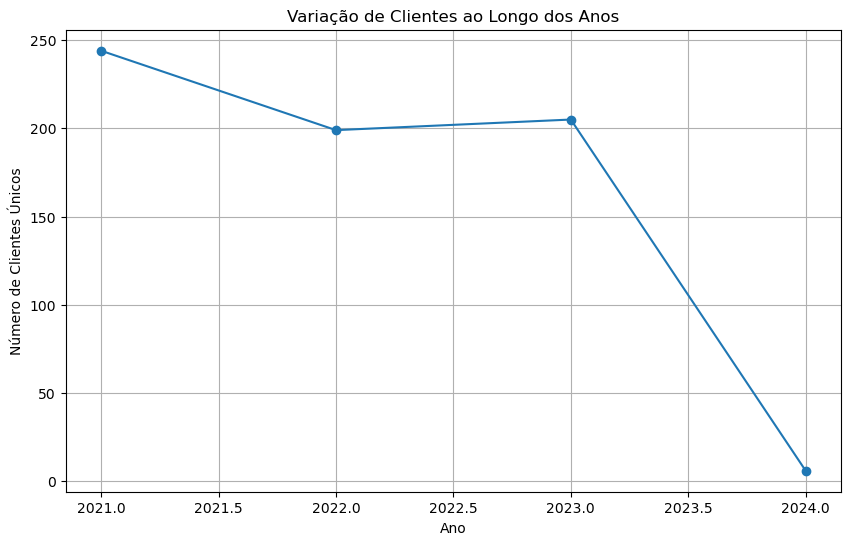

In [13]:
import matplotlib.pyplot as plt

# Carrega o DataFrame a partir do arquivo Excel
tabela_vendas = pd.read_excel("BASEDEVENDAS.xlsx")

# Extrai o ano da coluna 'ano' como um valor numérico
tabela_vendas['Ano'] = tabela_vendas['ano'].apply(lambda x: int(str(x)[:4]))

# Agrupa os dados por ano e conta o número de clientes únicos
dados_clientes_por_ano = tabela_vendas.groupby('Ano')['Cliente'].nunique()

# Cria um gráfico de linha para mostrar o crescimento de clientes ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(dados_clientes_por_ano.index, dados_clientes_por_ano.values, marker='o', linestyle='-')
plt.title('Variação de Clientes ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Clientes Únicos')
plt.grid(True)

# Exibe o gráfico
plt.show()

# Gráfico de distribuição de Probabilidade 
O gráfico demonstra a concentração da frequência dos valores dos planos da empresa Footvolley Club, indicando os valores mais ou menos frequentes. Além disso, a baixa frequência de alguns itens pode fazer com que eles pareçam ausentes no gráfico, mas na realidade, eles estão incluídos na distribuição normal gaussiana representada pela curva.

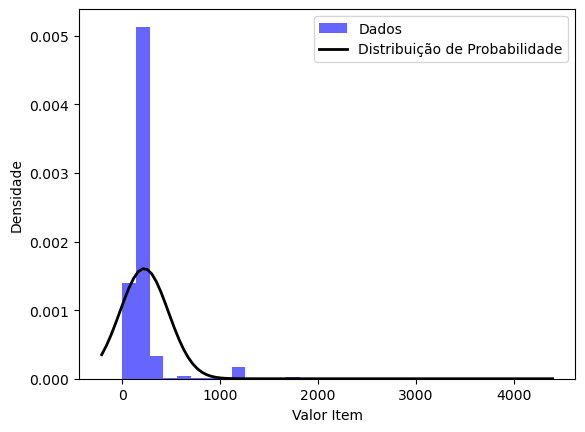

In [14]:
import numpy as np 
from scipy.stats import norm

# Carrega o DataFrame a partir do arquivo Excel
tabela_vendas = pd.read_excel("BASEDEVENDAS.xlsx")

# Seleciona a coluna 'Valor Item' para análise
valor_item = tabela_vendas['Valor Item']

# Ajusta uma distribuição normal aos dados
media, desvio_padrao = norm.fit(valor_item)

# Cria um histograma dos dados
plt.hist(valor_item, bins=30, density=True, alpha=0.6, color='b', label='Dados')

# Cria uma curva da distribuição normal ajustada
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media, desvio_padrao)
plt.plot(x, p, 'k', linewidth=2, label='Distribuição de Probabilidade')

# Adiciona rótulos e legenda
plt.xlabel('Valor Item')
plt.ylabel('Densidade')
plt.legend()

# Exibe o gráfico
plt.show()

# Análise realiazada e proposta de solução

DADOS EM DESTAQUE: 
Adesão massiva do PLANO MENSAL - 8 SESSÕES. 

ESTATÍSTICA PARA SE ATENTAR:
Decréscimo de clientes de 2021 para 2023.

   
PROPOSTA DE SOLUÇÃO: 
   Com base na análise do nosso DataFrame, observamos um decréscimo no número de clientes ativos. Essa redução (entre 2021 e 2023) pode ser um sinal de que é necessário tomar medidas para reter e atrair mais clientes, a depender do pagamento das mensalidaes no restante do ano. Um ponto de destaque é a alta adesão ao plano "PLANO MENSAL - 8 SESSÕES", que abriga cerca de 37% do faturamento da empresa. Embora seja positivo ter um plano popular, pode ser benéfico diversificar a oferta de planos e produtos para atrair um público mais amplo. O decrescimento de 2023 a 2024, por sua vez, não nos preocupa,pois refere-se aos casos de pagamento do plano anual.
   Recomenda-se que a empresa Footvolley Club concentre esforços na divulgação dos outros planos disponíveis em suas redes sociais e outros canais de marketing. Destacar os benefícios únicos de cada plano, como a flexibilidade de frequência, vantagens adicionais e preços competitivos, pode ser uma estratégia eficaz para atrair novos clientes.
   Além disso, a criação de promoções e ofertas especiais para os Planos/Produtos menos populares pode ser uma maneira eficiente de incentivar os clientes a experimentarem diferentes opções. Isso não apenas pode ajudar a reter os clientes existentes, mas também atrair novos interessados na Footvolley club.
    É importante acompanhar de perto os resultados dessas estratégias de marketing e ajustá-las conforme necessário para garantir o crescimento e a estabilidade da base de clientes da empresa no longo prazo.
